# Introduction

There are a number of cell ranger cell barcode lists available. There's 3 different versions available with the RNA-seq pipeline and there's another barcode list provided with the mulitome pipeline.

I thought it might be useful to compare them.

If you know of other barcodes that should be added let me know and I'll add them to the comparison.

In [1]:
import pandas
from matplotlib import pyplot
import upsetplot
from pathlib import Path
from xopen import xopen

In [2]:
barcode_files = {
    'rna-v1': Path('737K-april-2014_rc.txt'),
    'rna-v2': Path('737K-august-2016.txt'),
    'rna-v3': Path('3M-february-2018.txt.gz'),
    'arc-v1': Path('737K-arc-v1.txt'),
}

In [3]:
def read_barcodes(filename):
    barcodes = []
    with xopen(filename, 'rt') as instream:
        for line in instream:
            barcodes.append(line.rstrip())
    return barcodes

In [4]:
barcodes = {}
for name in barcode_files:
    barcodes[name] = read_barcodes(barcode_files[name])


# Lengths of barcodes between 10x barcode lists.

In [14]:
length_format = "{:8} {:8}"
lengths = {}
for name in barcodes:
    for bc in barcodes[name]:
        lengths.setdefault(name, set()).add(len(bc))

print(length_format.format("name", "length"))
for name in lengths:
    print(length_format.format(name, ','.join([str(x) for x in sorted(lengths[name])])))

name     length  
rna-v1   14      
rna-v2   16      
rna-v3   16      
arc-v1   16      


In [16]:
content = {}
for name in barcodes:
    if name not in ['rna-v1']:
        content[name] = barcodes[name]

barcodes_content = upsetplot.from_contents(content)

# Similarity between barcodes in 10x 16 base pair long permit lists.

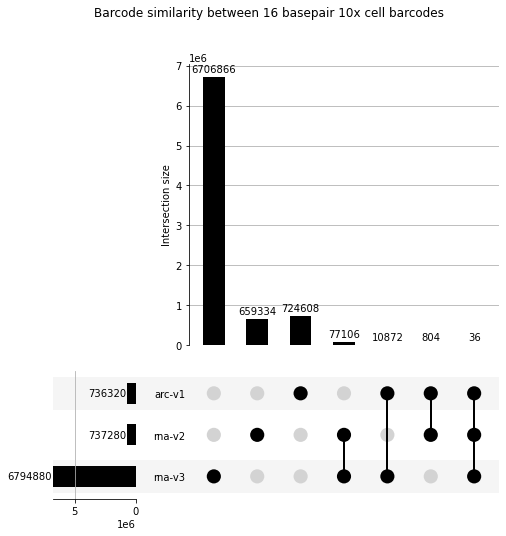

In [29]:
f = pyplot.figure(figsize=(8, 8))
f.suptitle("Barcode similarity between 16 basepair 10x cell barcodes")
_ = upsetplot.plot(barcodes_content, show_counts=True, fig=f, element_size=None)